In [150]:
import pod5
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12

In [97]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [125]:
neg_nuclei = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_0.pod5'
pos_nuclei_20 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_20.pod5'
pos_nuclei_100 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_100.pod5'
pos_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_500.pod5'
pos_sphe_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220517_ang_500.pod5'
chrom_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/220331_Nuclei_Ang500.pod5'
chrom_sphe_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/sphe/220524_500Ang_Spheroblast_dorado.pod5'
nuclei_chrom_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190429_chrom.pod5'
nuclei_neg_190819 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/20190819_neg.pod5'
nuclei_chrom_190819 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190819_chrom.pod5'
nuclei_neg_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/20190429_neg.pod5'
nuclei_chrom_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20210615_0802_shelansky_chrom.pod5'
nuclei_neg_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/20210615_neg.pod5'

In [129]:
def fetchSigPod5(mypod5, top_nread= 1000, nsig = 1000):
    signals = []
    c= 0
    with pod5.Reader(mypod5) as reader:
        print(f'total number of reads: {len(reader.read_ids)}')
        for read_record in reader.reads():
            signal = read_record.signal_pa
            random.shuffle(signal)
            signals.extend(signal[:nsig])
            c+=1
            if c == top_nread:
                break
    return signals

In [130]:
outf = open(dt_outpath + '0_signal_quantiles.tsv', 'w')
outf.write('sample\t0\t0.25\t0.5\t0.75\t1\tmean\tstd\n')

pod5s = [ chrom_sphe_500, pos_sphe_500, chrom_nuclei_500,  neg_nuclei, pos_nuclei_20, pos_nuclei_100, pos_nuclei_500, 
         nuclei_chrom_210615, nuclei_neg_210615, nuclei_neg_190819, nuclei_chrom_190819, nuclei_neg_190429, nuclei_chrom_190429]

labels = ['500uM_chrom_sphe_220524', '500uM_pos_sphe_220517', '500uM_chrom_nuclei_220331', '0uM_neg_nuclei_220308', '20uM_pos_nuclei_220308', '100uM_pos_nuclei_220308', '500uM_pos_nuclei_220308',
          '500uM_chrom_nuclei_210615', '0uM_neg_nuclei_210615', '0uM_neg_nuclei_190819', '500uM_chrom_nuclei_190819', '0uM_neg_nuclei_190429', '500uM_chrom_nuclei_190429']

allsignals = []
cmap = plt.get_cmap('tab20')

for i in range(len(pod5s)):
    mylabel = labels[i]
    print(f'start processing {mylabel}')
    mysignals = fetchSigPod5(pod5s[i])
    allsignals.append(mysignals)
    
    signal_quantile = np.quantile(mysignals, q = [0, 0.25, 0.5, 0.75, 1])
    print(f'{mylabel} signal quantile: {signal_quantile}; signal mean:{np.mean(mysignals)}; signal std:{np.std(mysignals)}')
    outf.write(mylabel+'\t'+'\t'.join([str(s) for s in signal_quantile])+f'\t{np.mean(mysignals)}\t{np.std(mysignals)}\n')
    
    print(f'plotting {mylabel}')
    fig = plt.figure(figsize=(4,3))
    plt.hist(mysignals, label=mylabel, density = True, bins = np.arange(-50, 150, 1),  color = cmap(i), alpha = 1)
    plt.xticks(np.arange(-50, 151, 25), rotation='vertical')
    plt.xlabel('signal picoampere (pA)')
    plt.ylabel('density')
    plt.legend()
    plt.savefig(fig_outpath+ f'0_{mylabel}_signal_distribution.pdf', bbox_inches='tight')
    plt.close()

outf.close()

start processing 500uM_chrom_sphe_220524
total number of reads: 18575
500uM_chrom_sphe_220524 signal quantile: [-41.32499313  67.87770081  78.16220093  88.82068634 243.46217346]; signal mean:77.02159881591797; signal std:17.619895935058594
plotting 500uM_chrom_sphe_220524
start processing 500uM_pos_sphe_220517
total number of reads: 24208
500uM_pos_sphe_220517 signal quantile: [-757.50018311   68.06469727   78.34919739   89.00767517  212.98265076]; signal mean:76.01040649414062; signal std:23.15542221069336
plotting 500uM_pos_sphe_220517
start processing 500uM_chrom_nuclei_220331
total number of reads: 74895
500uM_chrom_nuclei_220331 signal quantile: [-707.36694336   60.18672562   69.87194061   79.38421631  709.78826904]; signal mean:69.53353881835938; signal std:14.07857894897461
plotting 500uM_chrom_nuclei_220331
start processing 0uM_neg_nuclei_220308
total number of reads: 76833
0uM_neg_nuclei_220308 signal quantile: [-767.98504639   74.82449341   86.29256439   97.38463593  778.3250

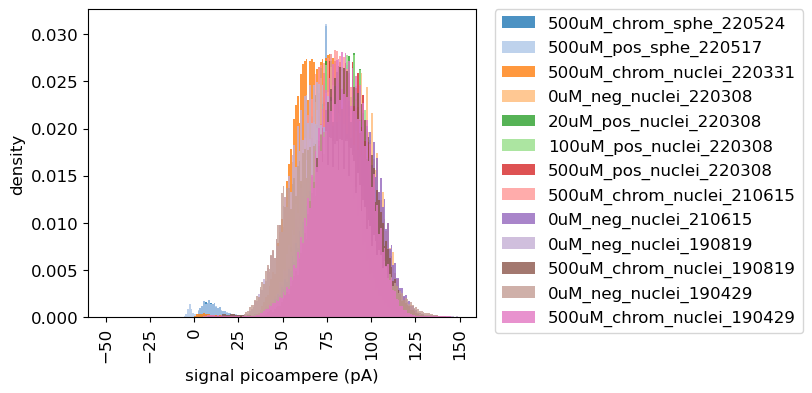

In [171]:
sampletoplot =  labels
fig = plt.figure(figsize=(5,4))
for i in range(len(allsignals)):
    if labels[i] not in sampletoplot: continue
    plt.hist(allsignals[i], label=labels[i], density = True, bins = np.arange(-50, 150, 1),  color = cmap(i), alpha = 0.8)
    plt.xticks(np.arange(-50, 151, 25), rotation='vertical')
    # plt.grid(alpha=0.5,axis = 'x')
    plt.xlabel('signal picoampere (pA)')
    plt.ylabel('density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ '0_all_signal_distribution.pdf', bbox_inches='tight')

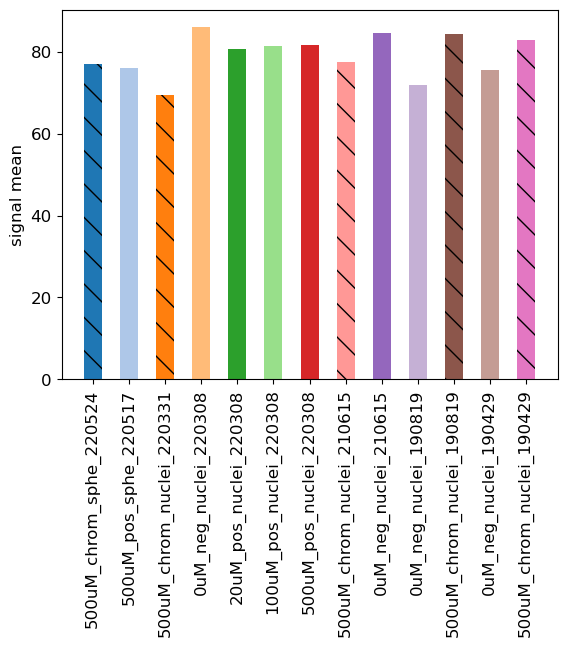

In [156]:
for i in range(len(allsignals)):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.mean(allsignals[i]), width = 0.5, color = cmap(i), hatch=hatch)

plt.xticks(np.arange(0, len(allsignals)), labels, rotation = 90)
plt.ylabel('signal mean')
plt.savefig(fig_outpath+ '0_all_signal_mean.pdf', bbox_inches='tight')

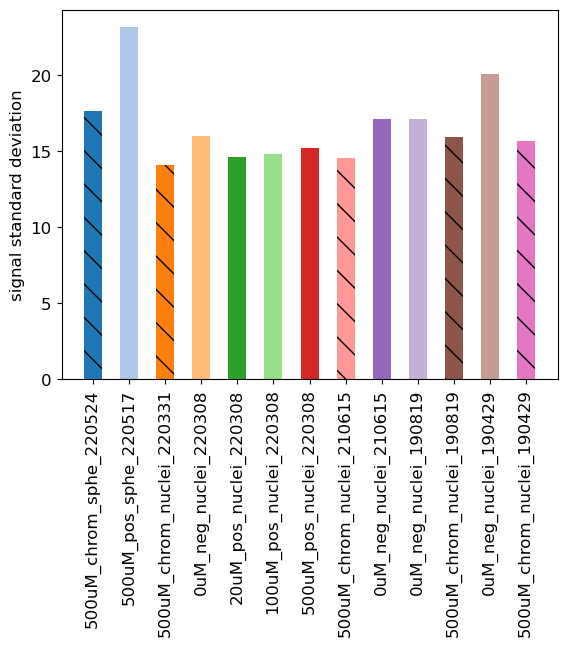

In [160]:
for i in range(len(allsignals)):
    if 'chrom' in labels[i]:
        hatch = '\\'
    else:
        hatch = ''
    plt.bar(i, np.std(allsignals[i]), width = 0.5, color = cmap(i), hatch=hatch)
plt.xticks(np.arange(0, len(allsignals)), labels, rotation = 90)
plt.ylabel('signal standard deviation')
plt.savefig(fig_outpath+ '0_all_signal_std.pdf', bbox_inches='tight')